In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Il y'a des sites et tout pour tout sa dans mon Ordinateur 

In [2]:
data = pd.read_excel('KPMG_dummy_data.xlsx', engine='openpyxl')

In [3]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
data.shape

(20000, 13)

-product_id (int64) : identifiant unique du produit acheté.

-customer_id : identifiant du client ayant réalisé l’achat. Peut être utilisé pour suivre les habitudes ou la fidélité des clients.

-transaction_id : identifiant unique de la vente. Chaque ligne du dataset représente une transaction différente.

-transaction_date : date (et parfois heure) à laquelle la vente a eu lieu.

-transaction_time : heure de la vente (souvent utile pour analyser les heures de forte activité).


-online_order : indique si la commande a été faite en ligne (1) ou en magasin (0). Très utile pour comparer les performances online vs. offline.

-order_status : statut final de la commande. Exemples :

               Approved = la commande a été validée,

               Cancelled = le client ou le système a annulé la commande,


               Pending = en attente.
Sert à analyser le taux d’annulation ou de non-finalisation.

-brand : marque du produit (ex: Giant Bicycles, Norco).

-product_line : ligne de produits, ex. : Standard, Youth, Road — souvent lié au type d’utilisation.

-product_class : niveau de gamme ou qualité (ex: high, medium, low). Sert à étudier les préférences selon le pouvoir d'achat.

-product_size : taille du produit (petit, moyen, grand — utile pour la logistique ou les stocks).

-list_price : prix affiché au client pour le produit. Représente le chiffre d’affaires brut potentiel.

-standard_cost : coût que l’entreprise paie pour ce produit (fabrication ou achat). Permet de calculer la marge brute = prix - coût.

-product_first_sold_date : date à laquelle le produit a été vendu pour la première fois. Permet d’analyser :

                L’ancienneté du produit dans le catalogue,

                La vitesse à laquelle un produit devient populaire ou obsolète.





In [5]:
data["transaction_time"] = pd.to_datetime(data["transaction_date"], format='%H:%M:%S').dt.time


In [6]:
data.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
transaction_time                   object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
data.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_time
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000,20000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN,00:00:00
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN,20000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549,NaN
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000,NaN
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000,NaN
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000,NaN
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000,NaN
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000,NaN


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
transaction_time             0
dtype: int64

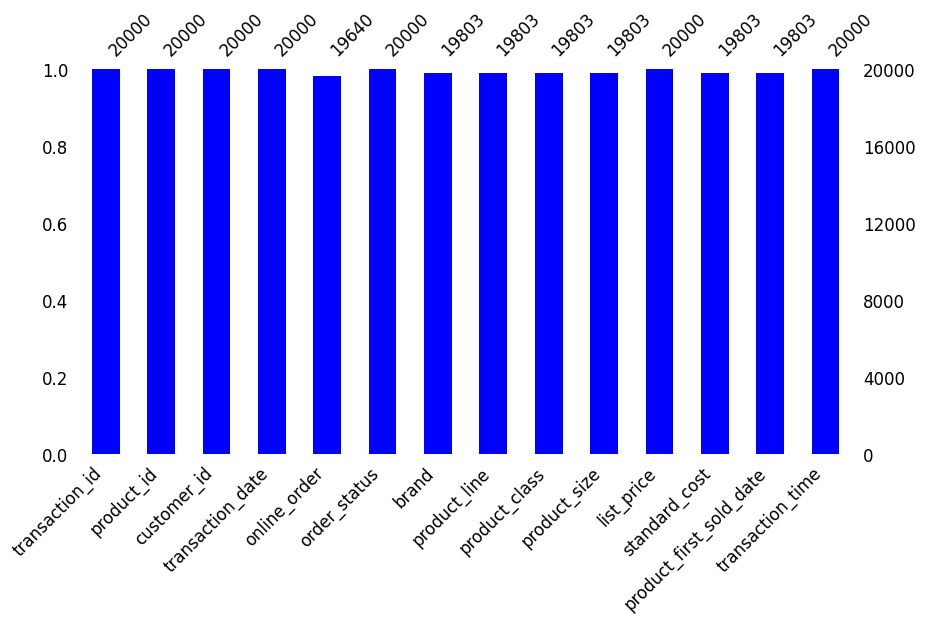

In [9]:
import missingno as msno # pour visualiser les valeurs manquantes
msno.bar(data, color='blue', figsize=(10, 5), fontsize=12)
data.isnull().sum()

In [10]:
missing_percent = data.isnull().mean() * 100
missing_percent = missing_percent.round(2)  # arrondi à 2 décimales
print(missing_percent)

transaction_id             0.00
product_id                 0.00
customer_id                0.00
transaction_date           0.00
online_order               1.80
order_status               0.00
brand                      0.98
product_line               0.98
product_class              0.98
product_size               0.98
list_price                 0.00
standard_cost              0.98
product_first_sold_date    0.98
transaction_time           0.00
dtype: float64


## Traitement des valeurs manquantes

In [11]:
data["online_order"].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [12]:
data["online_order"].mode()[0]

np.float64(1.0)

In [13]:
data["online_order"].fillna(data["online_order"].mode()[0], inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\1849212974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["online_order"].fillna(data["online_order"].mode()[0], inplace=True)


In [14]:
data["brand"].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [15]:
data["brand"].fillna(data["brand"].mode()[0], inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\2782584249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["brand"].fillna(data["brand"].mode()[0], inplace=True)


In [16]:
data["product_line"].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [17]:
data["product_line"].fillna(data["product_line"].mode()[0], inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\2881260002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["product_line"].fillna(data["product_line"].mode()[0], inplace=True)


In [18]:
data["product_class"].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [19]:
data["product_class"].fillna(data["product_class"].mode()[0], inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\2854174978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["product_class"].fillna(data["product_class"].mode()[0], inplace=True)


In [20]:
data["product_size"].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [21]:
data["product_size"].fillna(data["product_size"].mode()[0], inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\1507206487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["product_size"].fillna(data["product_size"].mode()[0], inplace=True)


In [22]:
data["standard_cost"].value_counts()

standard_cost
388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
312.735016      1
270.299988      1
667.400024      1
Name: count, Length: 103, dtype: int64

In [23]:
data["standard_cost"].fillna(data["standard_cost"].mean(), inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\2305159804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["standard_cost"].fillna(data["standard_cost"].mean(), inplace=True)


In [24]:
data["product_first_sold_date"].value_counts()

product_first_sold_date
33879.0    234
41064.0    229
37823.0    227
39880.0    222
38216.0    220
          ... 
41848.0    169
42404.0    168
41922.0    166
37659.0    163
34586.0    162
Name: count, Length: 100, dtype: int64

In [25]:
data["product_first_sold_date"].fillna(data["product_first_sold_date"].mean(), inplace=True)

C:\Users\ngale\AppData\Local\Temp\ipykernel_14100\2504230376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["product_first_sold_date"].fillna(data["product_first_sold_date"].mean(), inplace=True)


In [26]:
data.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
transaction_time           0
dtype: int64

In [27]:
data.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_time
count,20000.000000,20000.00000,20000.000000,20000,20000.000000,20000,20000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN,00:00:00
freq,NaN,NaN,NaN,NaN,NaN,19821,4450,14373,14023,13187,NaN,NaN,NaN,20000
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.509450,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549,NaN
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000,NaN
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000,NaN
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38206.000000,NaN
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000,NaN
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000,NaN


## Représentation des visualilisations du data

In [28]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
daily_sales = data.groupby('transaction_date').count()['transaction_id'].reset_index()
daily_sales

,transaction_date,transaction_id
0,2017-01-01,55
1,2017-01-02,46
2,2017-01-03,56
3,2017-01-04,59
4,2017-01-05,64
...,...,...
359,2017-12-26,55
360,2017-12-27,52
361,2017-12-28,57
362,2017-12-29,53


In [29]:
daily_sales = daily_sales.sort_values('transaction_date')
daily_sales

,transaction_date,transaction_id
0,2017-01-01,55
1,2017-01-02,46
2,2017-01-03,56
3,2017-01-04,59
4,2017-01-05,64
...,...,...
359,2017-12-26,55
360,2017-12-27,52
361,2017-12-28,57
362,2017-12-29,53


In [30]:
monthly_sales = daily_sales.set_index('transaction_date').resample('ME').sum()
monthly_sales

,transaction_id
transaction_date,
2017-01-31,1682
2017-02-28,1623
2017-03-31,1656
2017-04-30,1655
2017-05-31,1685
2017-06-30,1581
2017-07-31,1717
2017-08-31,1749
2017-09-30,1572


In [31]:
# Assurer que la colonne est bien en datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Créer une colonne 'month' à partir de la date
data['month'] = data['transaction_date'].dt.to_period('M')

# Grouper par mois et compter les transactions
monthly_sales = data.groupby('month').agg({'transaction_id': 'count'})

# Forcer l'inclusion de tous les mois de l'année 2017
all_months = pd.period_range(start='2017-01', end='2017-12', freq='M')
monthly_sales = monthly_sales.reindex(all_months, fill_value=0)

# Convertir pour affichage
monthly_sales.index = monthly_sales.index.to_timestamp()


In [32]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_time,month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,00:00:00,2017-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,00:00:00,2017-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,00:00:00,2017-10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,00:00:00,2017-08
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,00:00:00,2017-10


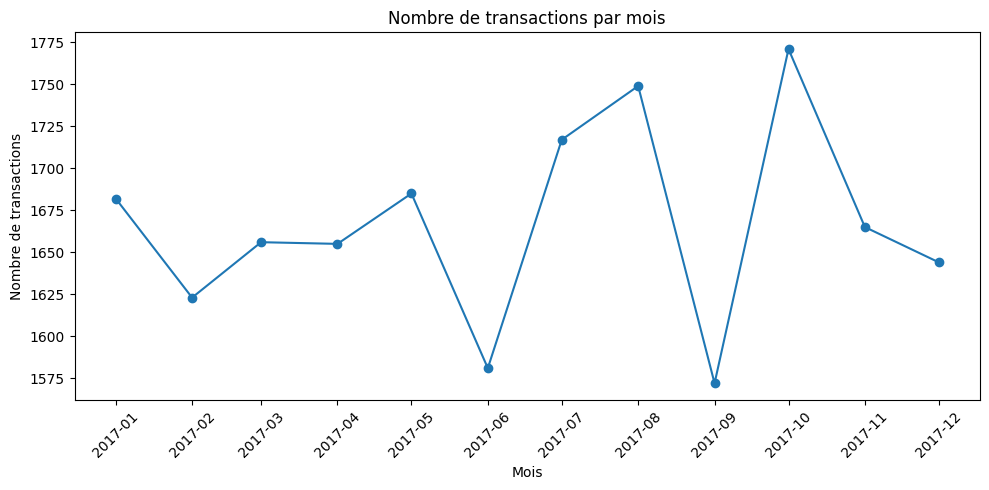

In [33]:
import matplotlib.dates as mdates
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['transaction_id'], marker='o')
plt.title("Nombre de transactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de transactions")
plt.xticks(rotation=45)
plt.tight_layout()
# Ajoute un format de date pour afficher tous les mois
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # chaque mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format : année-mois
plt.xticks(rotation=45)  # pour que ça ne se chevauche pas
plt.show()

Le graphique montre que les mois où il y'a plus de vente est le mois de Aoùt et de Novembre, par contre le mois de juin et septembre c'est où il y'a moins de vente

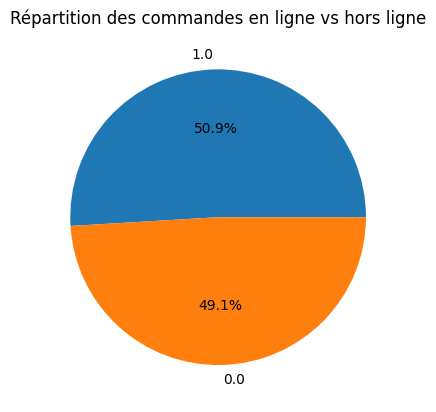

In [34]:
data['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Répartition Online vs Offline')
plt.title('Répartition des commandes en ligne vs hors ligne')
plt.ylabel('')  # pour enlever le label de l'axe y
plt.show()

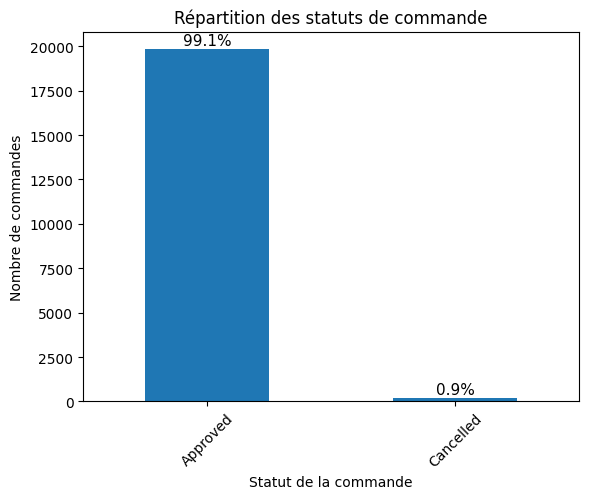

In [35]:
ax = data['order_status'].value_counts().plot(kind='bar', title='Statut des commandes')
plt.title('Répartition des statuts de commande')
plt.xlabel('Statut de la commande')
plt.ylabel('Nombre de commandes')
plt.xticks(rotation=45)

# Ajout uniquement des pourcentages, positionnés au-dessus des barres
for p in ax.patches:
    height = p.get_height()
    percentage = height / len(data)
    ax.annotate(
        f'{percentage:.1%}',  # Affiche uniquement le pourcentage
        (p.get_x() + p.get_width() / 2., height),  # Coordonnées du texte
        ha='center',
        va='bottom',
        xytext=(0, 1),  # Légèrement au-dessus de la barre
        textcoords='offset points',
        fontsize=11,
        color='black'
    )

plt.show()
 


D'apres le graphique nous constatons que 99.1% des commandes sont validées par rapport a 0.9% des commandes non validées

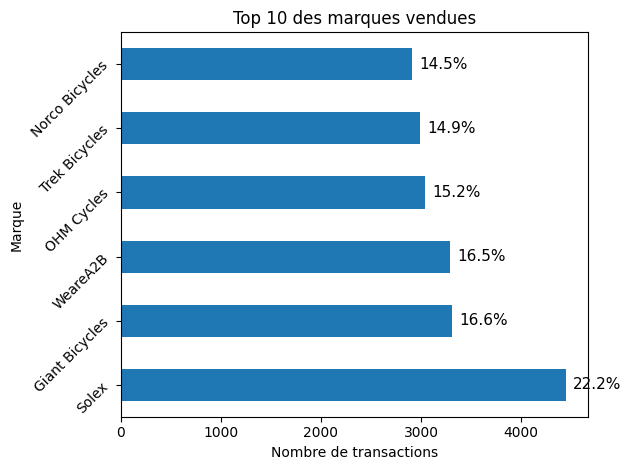

In [36]:
ax = data['brand'].value_counts().head(10).plot(kind='barh', title='Top 10 marques vendues')
plt.title('Top 10 des marques vendues')
plt.xlabel('Nombre de transactions')
plt.ylabel('Marque')
plt.yticks(rotation=45)
# Ajout des pourcentages à droite des barres
total = data['brand'].notna().sum()  # Total des marques valides pour calcul du pourcentage
for p in ax.patches:
    width = p.get_width()
    percentage = width / total
    ax.annotate(
        f'{percentage:.1%}',
        (width, p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=11,
        color='black'
    )

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Répartition des gammes'}, ylabel='count'>

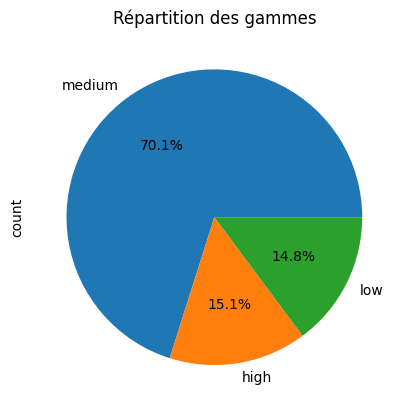

In [37]:
data['product_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Répartition des gammes')


## Modèle  Clustering: K-Means

In [38]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_time,month
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,00:00:00,2017-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,00:00:00,2017-05
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,00:00:00,2017-10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,00:00:00,2017-08
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,00:00:00,2017-10


## Calculer RFM

In [39]:
data["transaction_date"] =  pd.to_datetime(data['transaction_date'])

In [40]:
pd.Series(data.customer_id.unique()).sort_values(ascending=True)

91         1
1684       2
3351       3
3419       4
1676       5
        ... 
3059    3497
1068    3498
682     3499
1784    3500
3249    5034
Length: 3494, dtype: int64

In [41]:
data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'transaction_time', 'month'],
      dtype='object')

Calcule la récence 


In [42]:
data_recency = data.groupby(by='customer_id', as_index=False)['transaction_date'].max() # Trouver la dernière date d'achat par client
data_recency.columns = ['customer_id', 'transaction_date'] # Renommer les colonnes pour plus de clarté
recent_date = data_recency['transaction_date'].max() # Trouver la date la plus récente dans les transactions
data_recency['Recency'] = data_recency['transaction_date'].apply(lambda x: (recent_date - x).days) # Calculer la récence en jours
data_recency.head()

,customer_id,transaction_date,Recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,3,2017-09-19,102
3,4,2017-06-18,195
4,5,2017-12-14,16


In [43]:
recent_date = data_recency['transaction_date'].max()
recent_date

Timestamp('2017-12-30 00:00:00')

Calcule de la fréquence

In [44]:
frequency_data = data.drop_duplicates().groupby(by=['customer_id'], as_index=False)['transaction_date'].count()
frequency_data.columns = ['customer_id', 'Frequency']
frequency_data.head()

,customer_id,Frequency
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6


Calcule de la valeur monetaire 

In [45]:
data['Total'] = data['list_price']  # Total spent by each customer
monetary_data = data.groupby(by='customer_id', as_index=False)['Total'].sum()
monetary_data.columns = ['customer_id', 'Monetary']
monetary_data.head()

,customer_id,Monetary
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20


Fusionner les données de récence, de fréquence et mlonétaires

In [46]:
rf_data = data_recency.merge(frequency_data, on='customer_id')
rfm_data = rf_data.merge(monetary_data, on='customer_id').drop(columns='transaction_date')
rfm_data.head()

,customer_id,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,8,9888.23
3,4,195,2,1047.72
4,5,16,6,5903.20


Version plus rapide 

In [47]:
# 1. Définir 'now' avant le groupby
now = data['transaction_date'].max()

# 2. Calcul RFM
rfm = data.groupby('customer_id').agg({
    'transaction_date': lambda x: (now - x.max()).days,  # Recency
    'customer_id': 'count',                              # Frequency
    'list_price': 'sum'                                  # Monetary
}).rename(columns={
    'transaction_date': 'Recency',
    'customer_id': 'Frequency',
    'list_price': 'Monetary'
}).reset_index()
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,8,9888.23
3,4,195,2,1047.72
4,5,16,6,5903.20


In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Standardisation 

In [49]:
X = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ✅ cette ligne crée X_scaled !

Sélection du Nombre de Clusters (k) pour pouvoir faire une bonne séparation des clients

Méthode des silhouettes

k = 2 | Silhouette Score = 0.3735
k = 3 | Silhouette Score = 0.3791
k = 4 | Silhouette Score = 0.3248
k = 5 | Silhouette Score = 0.3315
k = 6 | Silhouette Score = 0.3098
k = 7 | Silhouette Score = 0.2865
k = 8 | Silhouette Score = 0.2867
k = 9 | Silhouette Score = 0.2766


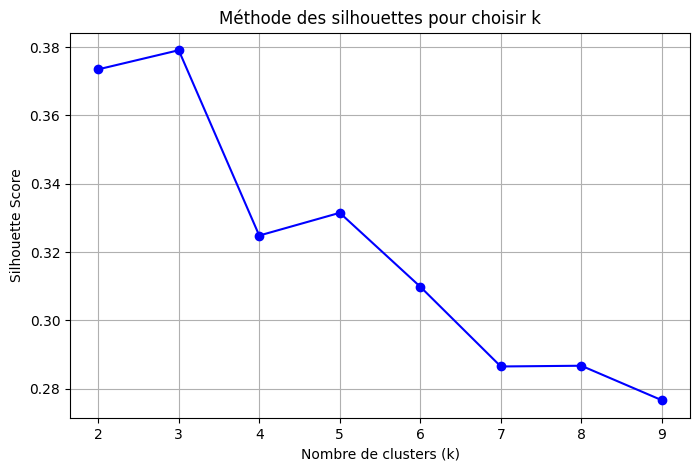


👉 Le meilleur nombre de clusters selon la méthode des silhouettes est : k = 3


In [50]:
silhouette_scores = []
K = range(2, 10)  # On teste entre 2 et 9 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f'k = {k} | Silhouette Score = {score:.4f}')

#  Visualisation du score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode des silhouettes pour choisir k")
plt.grid(True)
plt.show()

#  Identifier le meilleur k
best_k = K[np.argmax(silhouette_scores)]
print(f"\n👉 Le meilleur nombre de clusters selon la méthode des silhouettes est : k = {best_k}")


      customer_id  Recency  Frequency  Monetary  Cluster
597           598      131          7   5976.19        0
594           595      184          3   3268.42        0
621           622      266          3   4498.00        0
617           618      308          2   2207.71        0
640           641      202          4   3853.34        0
...           ...      ...        ...       ...      ...
3491         3499       51          7   7673.48        2
2               3      102          8   9888.23        2
3485         3493       93          6  10053.82        2
0               1        7         11   9084.45        2
3487         3495       13          7   8626.65        2

[3494 rows x 5 columns]


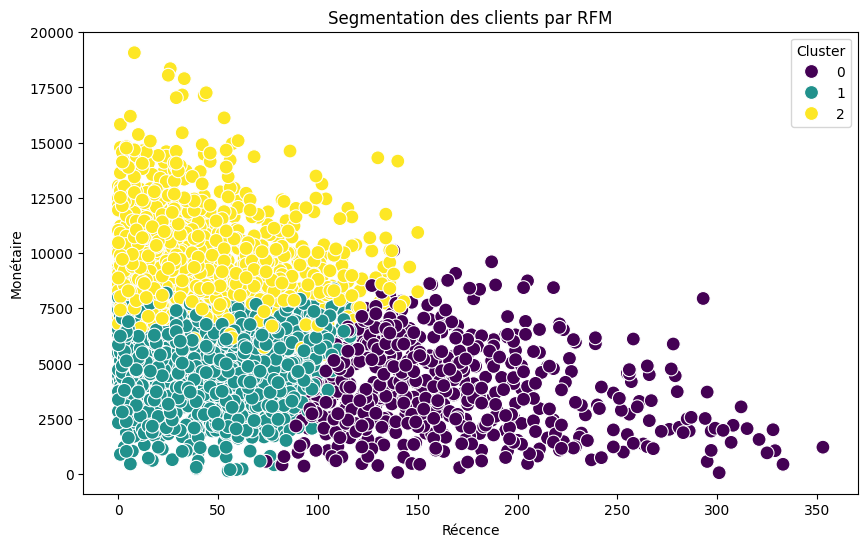

In [51]:
# Appliquer KMeans avec 3 groupes
kmeans = KMeans(n_clusters=3, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Affichage des résultats
print(rfm.sort_values('Cluster'))
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Segmentation des clients par RFM')
plt.xlabel('Récence')
plt.ylabel('Monétaire')
plt.legend(title='Cluster')
plt.show()

Ajouter une colonne "profil" (optionnel mais utile)

In [52]:
# Exemple basique (à adapter à tes résultats réels)
def assign_profile(cluster):
    if cluster == 2:
        return "Clients premium"
    elif cluster == 1:
        return "Clients réguliers"
    elif cluster == 3:
        return "Clients moyens"
    else:
        return "Clients perdus"

rfm['Profil'] = rfm['Cluster'].apply(assign_profile)

In [53]:
rfm

,customer_id,Recency,Frequency,Monetary,Cluster,Profil
0,1,7,11,9084.45,2,Clients premium
1,2,128,3,4149.07,0,Clients perdus
2,3,102,8,9888.23,2,Clients premium
3,4,195,2,1047.72,0,Clients perdus
4,5,16,6,5903.20,1,Clients réguliers
...,...,...,...,...,...,...
3489,3497,52,3,3744.07,1,Clients réguliers
3490,3498,127,6,5177.06,0,Clients perdus
3491,3499,51,7,7673.48,2,Clients premium
3492,3500,144,6,4922.41,0,Clients perdus


 Visualiser les groupes de clients (clusters) selon leurs comportements RFM

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Méthodes pour déterminer le nombre optimal de composantes :

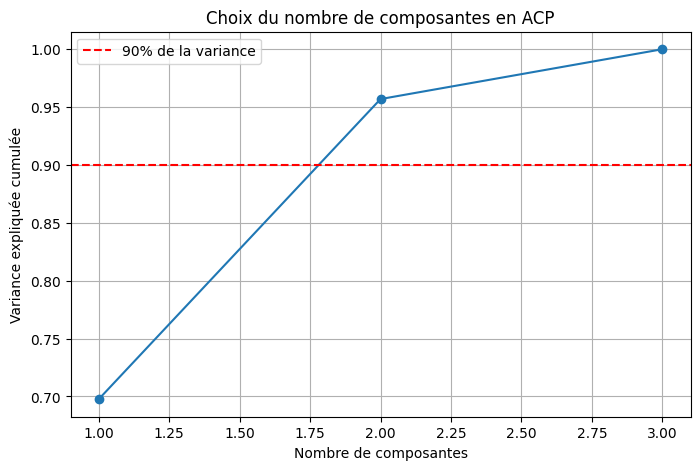

In [55]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Affichage de la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Nombre de composantes") 
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix du nombre de composantes en ACP")
plt.axhline(y=0.9, color='r', linestyle='--', label="90% de la variance")
plt.grid(True)
plt.legend()  
plt.show()


Le nombre optimal de composantes est 2, car cela permet de conserver plus de 90% de l'information, tout en réduisant la dimension du jeu de données.

In [56]:
# 1. Réduction dimensionnelle avec ACP à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 2.45039742,  0.03330793],
       [-1.71397137,  0.51634097],
       [ 1.10708021,  1.29169143],
       ...,
       [ 0.71402151,  0.13305066],
       [-0.82306732,  1.18094274],
       [-1.96698198, -0.4695407 ]])

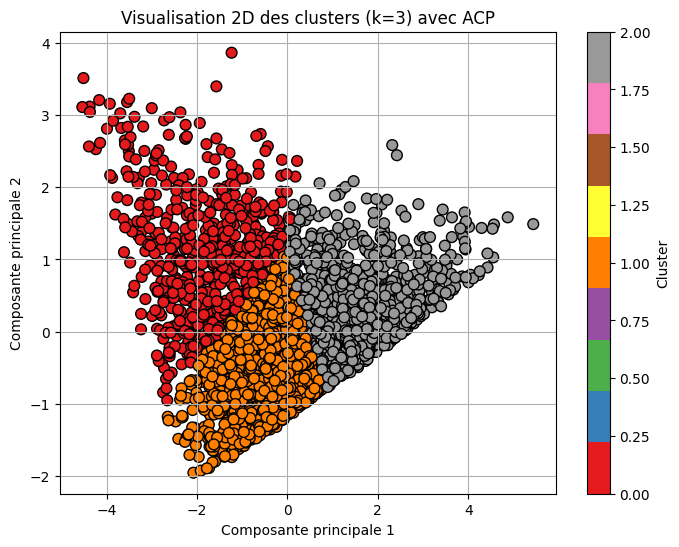

In [57]:
# 3. Visualisation
k=3  # adapte selon ton cas
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=rfm['Cluster'], cmap='Set1', s=60, edgecolor='k')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title(f'Visualisation 2D des clusters (k={3}) avec ACP')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

Cette analyse montre que nos données se divisent en 3 groupes distincts, chacun ayant des comportements clairement différenciés. Le premier groupe (position extrême) représente probablement un segment atypique à haut potentiel, le second correspond à notre cœur de cible standard, tandis que le troisième groupe isolé mérite une attention particulière.